soudabe mohammad hashemi  
810197688  
CA5_2

In [1]:
from google.colab import drive
drive.mount("/content/drive")
!cp "/content/drive/MyDrive/UTKFace.tar.gz" ./UTKFace.tar.gz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [105]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os

In [106]:
img_path = list()
races = list()
path = '/content/UTKFace'

for img in os.listdir(path):
    temp = img.split('.')
    if len(temp[0].split('_'))==4:
        img_path.append(os.path.join(path, img))
        age, gender, race, date = temp[0].split('_')
        races.append(int(race))
    else:
        continue

classLabels = {0:"white", 1:"black", 2:"asian", 3:"indian", 4:"others"}
races = [str(to_categorical(i,len(classLabels))) for i in races]

df = pd.DataFrame({'image': img_path, 'race':races})

In [107]:
dataGender = preprocessing.image.ImageDataGenerator(rescale=1/255.0, validation_split=0.3)

In [108]:
trainData = dataGender.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'race',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "categorical",
    subset = "training",
    shuffle = True
)

Found 16594 validated image filenames belonging to 5 classes.


In [109]:
testData = dataGender.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'race',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "categorical",
    subset = "validation",
    shuffle = True
)

Found 7111 validated image filenames belonging to 5 classes.


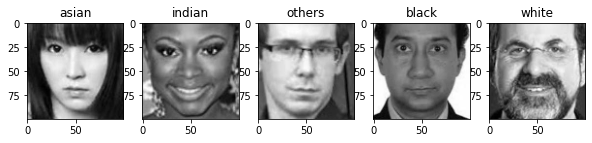

In [110]:
images , labels = trainData.next()
fig , ax= plt.subplots(1,5)
fig.set_size_inches(10,4)
seen_labels=set()
i=0
for img,label in zip(images,labels):
  found_label = backend.argmax(label).numpy()
  if found_label not in seen_labels:
    ax[i].imshow(img.reshape(100,100),cmap='gray')
    ax[i].set_title(classLabels[found_label])
    i = i+1
    seen_labels.add(found_label)

<BarContainer object of 5 artists>

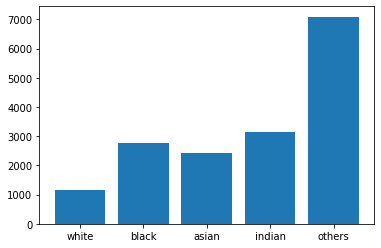

In [111]:
classes = [0,0,0,0,0]

for label in trainData.classes:
  classes[label] += 1

x = ["white","black","asian","indian","others"]
y = [classes[0],classes[1],classes[2], classes[3], classes[4]]
plt.bar(x,y)

In [112]:
def PlotLoss(history):
  hist=history.history
  x=[]
  for i in range(len(hist['loss'])):
    x.append(i)

  plt.plot(x , hist['loss'] , label='Train')
  plt.plot(x , hist['val_loss'] , label='Test')
  plt.legend()

def PlotAccuracy(history):
  hist=history.history
  x=[]
  for i in range(len(hist['accuracy'])):
    x.append(i)

  plt.plot(x , hist['accuracy'] , label='Train')
  plt.plot(x , hist['val_accuracy'] , label='Test')
  plt.legend()

def ShowResults(testVar):
  preds = model.predict(testVar)
  a = classification_report(testVar.classes , backend.argmax(preds).numpy())
  print(a)

In [113]:
input = layers.Input(shape=(100,100,1))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)


In [114]:
model = models.Model(inputs= input, outputs = output)

In [115]:
model.compile(optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


فرمول محاسبه $param$ به صورت زیر است.  
param = (input data dimension + 1 (because each neuron has a bias) ) * number of neurons  
(10000+1)* 1024 = 10241024  
(1024+1)*512 = 524800  
(512 +1) * 5 = 2565  
total = 10768389  


In [116]:
history = model.fit(trainData, validation_data=testData, epochs=10)

Epoch 1/10
519/519 [==============================] - 34s 65ms/step - loss: 1.2845 - accuracy: 0.5013 - val_loss: 1.1741 - val_accuracy: 0.5798
Epoch 2/10
519/519 [==============================] - 34s 65ms/step - loss: 1.1092 - accuracy: 0.5820 - val_loss: 1.0190 - val_accuracy: 0.6411
Epoch 3/10
519/519 [==============================] - 33s 64ms/step - loss: 1.0236 - accuracy: 0.6190 - val_loss: 0.9571 - val_accuracy: 0.6535
Epoch 4/10
519/519 [==============================] - 34s 65ms/step - loss: 0.9717 - accuracy: 0.6446 - val_loss: 1.0431 - val_accuracy: 0.6282
Epoch 5/10
519/519 [==============================] - 34s 65ms/step - loss: 0.9403 - accuracy: 0.6584 - val_loss: 0.9301 - val_accuracy: 0.6543
Epoch 6/10
519/519 [==============================] - 34s 65ms/step - loss: 0.9106 - accuracy: 0.6708 - val_loss: 1.0091 - val_accuracy: 0.6328
Epoch 7/10
519/519 [==============================] - 34s 65ms/step - loss: 0.8766 - accuracy: 0.6821 - val_loss: 0.9067 - val_accuracy:

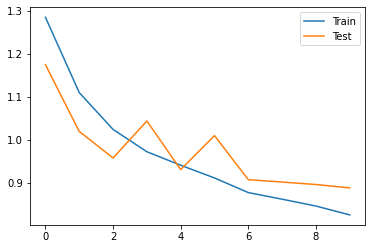

In [117]:
PlotLoss(history)


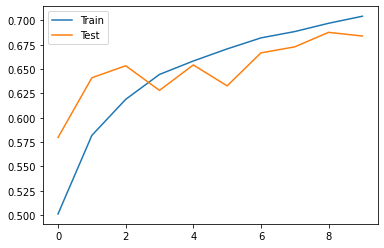

In [118]:
PlotAccuracy(history)

In [119]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       525
           1       0.17      0.30      0.22      1209
           2       0.12      0.08      0.10      1023
           3       0.18      0.18      0.18      1370
           4       0.41      0.42      0.42      2984

    accuracy                           0.27      7111
   macro avg       0.18      0.19      0.18      7111
weighted avg       0.26      0.27      0.26      7111



قسمت اول:  
momentum is a variant of the stochastic gradient descent. It replaces the gradient with a momentum which is an aggregate of gradients.
momentum help us to speed up learning and not getting stuck in local minima.italicized text

In [120]:
model.compile(optimizers.SGD(learning_rate=0.01,momentum=0.5), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=10)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
519/519 [==============================] - 37s 71ms/step - loss: 0.8653 - accuracy: 0.6871 - val_loss:

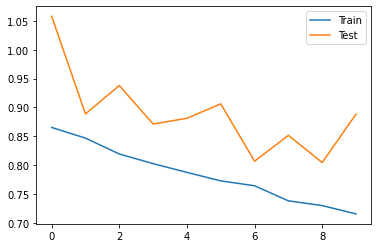

In [121]:
PlotLoss(history)

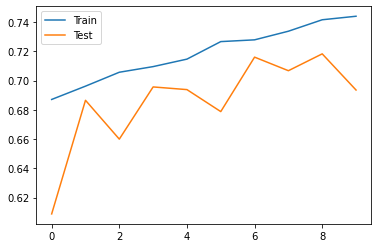

In [122]:
PlotAccuracy(history)

In [123]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.03      0.00      0.00       525
           1       0.17      0.30      0.22      1209
           2       0.14      0.10      0.12      1023
           3       0.20      0.16      0.18      1370
           4       0.42      0.45      0.44      2984

    accuracy                           0.28      7111
   macro avg       0.19      0.20      0.19      7111
weighted avg       0.27      0.28      0.27      7111



In [124]:
model.compile(optimizers.SGD(learning_rate=0.01,momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=10)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
519/519 [==============================] - 37s 71ms/step - loss: 1.0792 - accuracy: 0.6050 - val_loss:

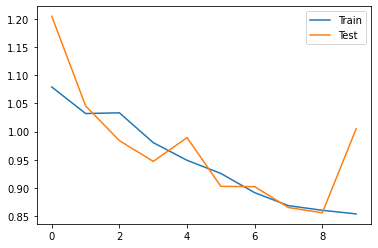

In [125]:
PlotLoss(history)

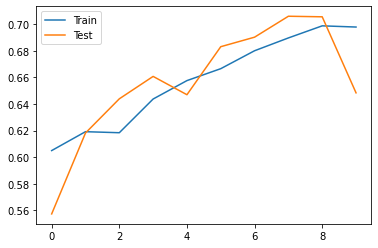

In [126]:
PlotAccuracy(history)

In [127]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.04      0.00      0.00       525
           1       0.17      0.15      0.16      1209
           2       0.14      0.22      0.17      1023
           3       0.20      0.12      0.15      1370
           4       0.43      0.52      0.47      2984

    accuracy                           0.30      7111
   macro avg       0.20      0.20      0.19      7111
weighted avg       0.27      0.30      0.28      7111



If the momentum term is larger then the learning rate should be kept at large values, then we might skip the minimum with a huge step.
As we can see in the result of momentum 0.9, loss increased and accuracy decreased for train data but for test data a little loss decresed and accuracy increased.

ممنتوم به این صورت عمل می‌کند که در هنگام فرایند یادگیری بعد از مدتی که مقدار $loss$ تغییر خاصی نکرد پارامتر مقدار یادگیری را افزایش می‌دهد به امید آن که مقادیر $loss$ تغییر کنند و کاهش یابند در واقع این عمل از $local-minimum$ جلوگیری می‌کند. اگر مقدار پارامتر ممنتوم خیلی زیاد باشد باعث می‌شود وقتی به $global-minimum$ رسیدیم از آن خارج شویم. 

In [128]:
model.compile(optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=10)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
519/519 [==============================] - 40s 76ms/step - loss: 0.9010 - accuracy: 0.6789 - val_loss:

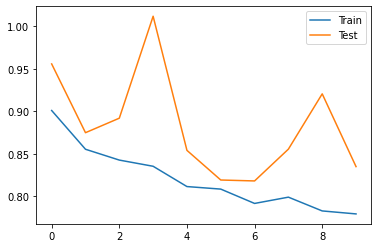

In [129]:
PlotLoss(history)

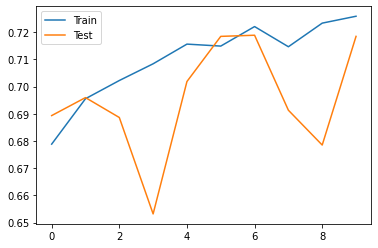

In [130]:
PlotAccuracy(history)

In [131]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       525
           1       0.18      0.19      0.18      1209
           2       0.14      0.12      0.13      1023
           3       0.20      0.26      0.23      1370
           4       0.41      0.44      0.43      2984

    accuracy                           0.28      7111
   macro avg       0.29      0.20      0.19      7111
weighted avg       0.30      0.28      0.27      7111



نسبت به قبل برای داده‌های $train$ مقدار $loss$ کاهش و $accuracy$ افزایش یافته است اما داده‌های ‌$test$ مقدار $loss$ بیشتر و $accuracy$ به نسبت ثابتی دارد.  
در $adam$ مقادیر $loss$ سریعتر از $SGD$ کاهش میابد.

قسمت دوم:

مرتب سازی داده‌های چندبعدی شبکه‌های عصبی به مقدار زیادی حافظه جانبی نیاز دارد. از طرفی نیاز است شبکه عصبی چندین بار تغذیه شود پس داده‌های نمونه در دسترس کمتر از داده‌های مورد نیاز برای دستیابی به نتیجه مطلوب است. ممکن است که اطلاعات کافی در داده‌های $train$ وجود داشته باشد اما $gradient-descent-algorithm$ برای واکشی أن زمانبر است. بنابراین برای داده‌های محدود می‌توان چند $pass$ روی دیتا انجام داد پس به این طریق $epoch$ها می‌توانند کمک کنند.  
 رای جلوگیری از $overfitting$ راه حل بهتر این است که زودتر فرایند شبکه را قطع کنیم و از $regularization$ استفاده کنیم و از $epoch$های خیلی بزرگ استفاده نکنیم
 (ممکن است $overfitting$ رخ دهد)  
 اگر تعداد $epoch$ ها کم باشد ممکن است دچار $underfitting$ شویم

In [30]:
model.compile(optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=20)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              10241024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
519/519 [==============================] - 38s 72ms/step - loss: 0.7933 - accuracy: 0.7184 - val_loss: 0

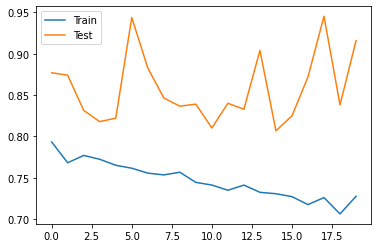

In [31]:
PlotLoss(history)

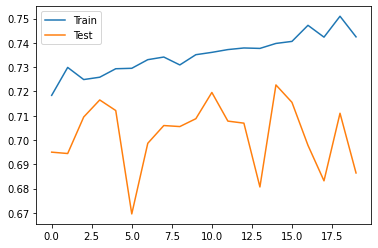

In [32]:
PlotAccuracy(history)

In [33]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.09      0.05      0.06       525
           1       0.17      0.14      0.16      1209
           2       0.13      0.12      0.13      1023
           3       0.19      0.30      0.24      1370
           4       0.42      0.39      0.41      2984

    accuracy                           0.27      7111
   macro avg       0.20      0.20      0.20      7111
weighted avg       0.27      0.27      0.27      7111



با $epoch$های بیشتر پارامترهای نام برده شده برای داده‌های $test$ پیشرفت کرده‌اند.  
اما $F1$ تقریبا ثابت است.

قسمت سوم:

در $classification$ از $argmax$ استفاده می‌کنیم. حالتی را در نظر بگیرید که دوتا کلاس صفر و یک داریم. احتمال تعلق یک داده را به کلاس صفر $0.4$ و به کلاس یک را $0.55$ پیشبینی کرده‌ایم. پس مدل کلاس این دیتا را یک تخمین می‌زند. فرض می‌کنیم کلاس واقعی آن نیز یک باشد. اگر $MSE$ استفاده کنیم به ما کلاس یک را برمی‌گرداند اما ‌$binary-cross-entropy$ کلاس نزدیکتری را تخمین می‌زند  
src: https://stackoverflow.com/questions/56013688/why-not-use-mean-squared-error-for-classification-problems  

In [34]:
model.compile(optimizers.Adam(learning_rate=0.001), loss="MSE", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=20)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              10241024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
519/519 [==============================] - 38s 73ms/step - loss: 0.0726 - accuracy: 0.7440 - val_loss: 0

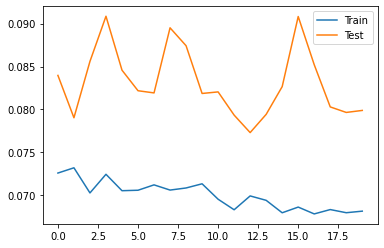

In [35]:
PlotLoss(history)

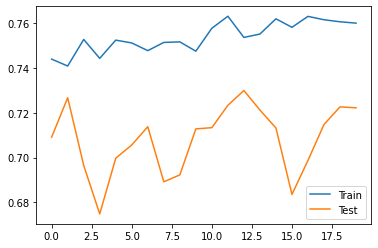

In [36]:
PlotAccuracy(history)

In [37]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.06      0.02      0.02       525
           1       0.16      0.14      0.15      1209
           2       0.13      0.13      0.13      1023
           3       0.21      0.18      0.20      1370
           4       0.42      0.53      0.47      2984

    accuracy                           0.30      7111
   macro avg       0.20      0.20      0.19      7111
weighted avg       0.27      0.30      0.28      7111



قسمت چهارم:

از روش‌های $regularization$ برای رفع مشکل $overfit$ استفاده می‌شود. مثلا $activity-regularization$ بر اساس مقدار $activation$ مدل را جریمه می‌کند. $weight-constraint$ اندازه وزن‌ها را در یک محدوده خاص تعیین می‌کند. $dropout$ بعضی از مقدار ورودی را قبل از ورود به لایه حذف می‌کند.

In [38]:
input = layers.Input(shape=(100,100,1))
output = layers.Flatten()(input)
output = layers.Dense(1024,activation="relu" , kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(512,activation="relu" , kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(5,activation="softmax" , kernel_regularizer=regularizers.l2(0.0001))(output)
model = models.Model(inputs=input,outputs=output)

In [39]:
model.compile(optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=20)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
519/519 [==============================] - 50s 96ms/step - loss: 1.6731 - accuracy: 0.5160 - val_loss:

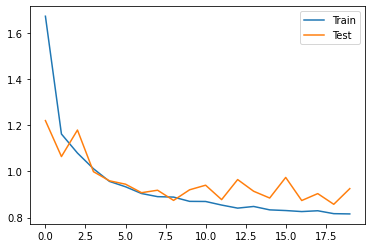

In [40]:
PlotLoss(history)

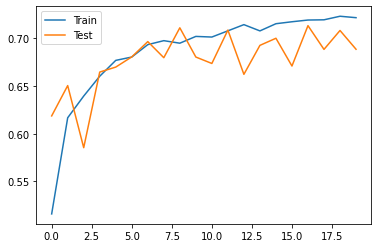

In [41]:
PlotAccuracy(history)

In [42]:
ShowResults(testData)

              precision    recall  f1-score   support

           0       0.12      0.01      0.02       525
           1       0.16      0.12      0.13      1209
           2       0.14      0.22      0.17      1023
           3       0.19      0.17      0.18      1370
           4       0.42      0.47      0.44      2984

    accuracy                           0.28      7111
   macro avg       0.21      0.20      0.19      7111
weighted avg       0.27      0.28      0.27      7111



In [137]:
input = layers.Input(shape=(100,100,1))
output = layers.Flatten()(input)
output = layers.Dense(1024,activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512,activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(5,activation="softmax")(output)
model = models.Model(inputs=input,outputs=output)

In [138]:
model.compile(optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(trainData, validation_data=testData, epochs=20)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 2565

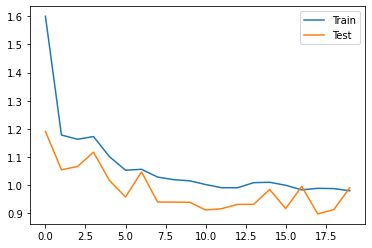

In [139]:
PlotLoss(history)

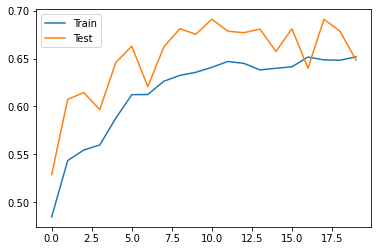

In [140]:
PlotAccuracy(history)

In [ ]:
ShowResults(testData)

In [132]:
preds = model.predict(testData)
predicted_categories = np.argmax(preds, axis=1)

5 sample of true prediction:

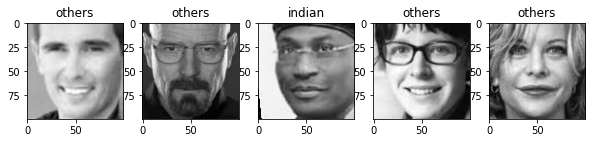

In [135]:
images , labels = testData.next()
fig , ax= plt.subplots(1,5)
fig.set_size_inches(10,4)
i=-1
count =0
true_label = np.argmax(labels, axis=1)
for img,label in zip(images,labels):
    i+=1
    if true_label[i] == predicted_categories[i]:
        ax[count].imshow(img.reshape(100,100),cmap='gray')
        ax[count].set_title(classLabels[true_label[i]])
        count +=1
        if count == 5:
            break


5 sample of false prediction:

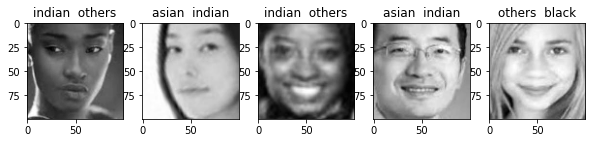

In [136]:
images , labels = testData.next()
fig , ax= plt.subplots(1,5)
fig.set_size_inches(10,4)
i=-1
count =0
true_label = np.argmax(labels, axis=1)
for img,label in zip(images,labels):
    i+=1
    if true_label[i] != predicted_categories[i]:
        ax[count].imshow(img.reshape(100,100),cmap='gray')
        ax[count].set_title(classLabels[true_label[i]]+"  "+ classLabels[predicted_categories[i]] )
        count +=1
        if count == 5:
            break

فاز چهارم:

In [48]:
input = layers.Input(shape=(100,100,1))
output = layers.Flatten()(input)
output = layers.Dense(10000, activation="relu")(output)
output = layers.Dense(5000, activation="relu")(output)
output = layers.Dense(1000, activation="relu")(output)
output = layers.Dense(500, activation="relu")(output)
output = layers.Dense(2, activation="relu")(output)
temp = output
output = layers.Dense(5, activation="softmax")(output)
model = models.Model(inputs=input,outputs=output)